In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

1.Implement Principal Component Analysis (PCA) in Python on the Iris dataset to reduce the data to two principal components and visualize the transformed dataset using a scatter plot. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

In [3]:
X_meaned = X - np.mean(X, axis=0)

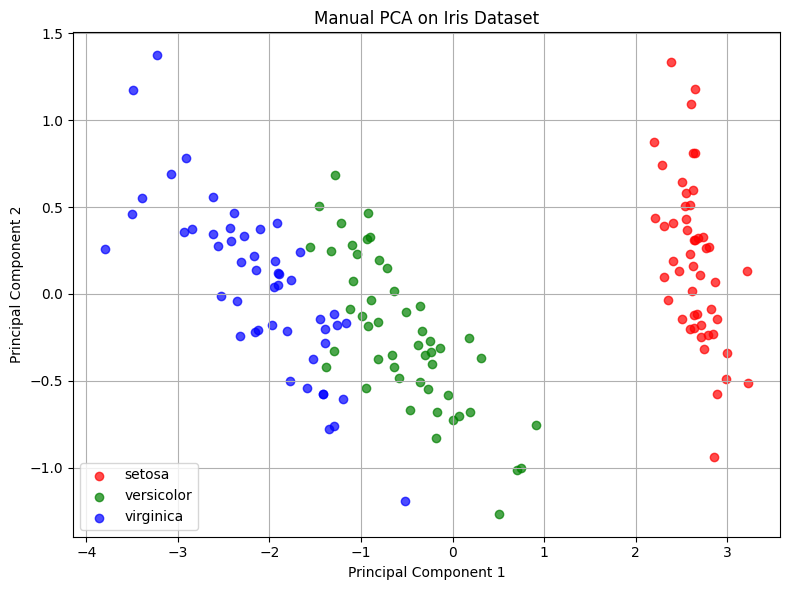

In [4]:
cov_matrix = np.cov(X_meaned, rowvar=False)

eigen_values, eigen_vectors = np.linalg.eigh(cov_matrix)
sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalues = eigen_values[sorted_index]
sorted_eigenvectors = eigen_vectors[:, sorted_index]
eigenvector_subset = sorted_eigenvectors[:, 0:2]
X_reduced = np.dot(X_meaned, eigenvector_subset)

plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue']

for i, color, label in zip([0, 1, 2], colors, target_names):
    plt.scatter(X_reduced[y == i, 0], X_reduced[y == i, 1], color=color, label=label, alpha=0.7)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Manual PCA on Iris Dataset')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

